<a href="https://colab.research.google.com/github/lmbd92/DataScienceMonograph/blob/main/EDA_RETAIL_ONLINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del dataset "Online Retail"

## 1. Librerias y configuraciones previas


In [ ]:
# Tratamiento de datos
# ==============================================================================

import numpy as np
import pandas as pd

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer # Método de imputación 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import MissingIndicator # Identificar datos faltantes
from sklearn.preprocessing import MinMaxScaler # Este estimador escala y traduce cada característica
from scipy.stats import median_abs_deviation # MAD
from scipy.special import entr # Entropía de Shannon
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada
from sklearn.preprocessing import StandardScaler # Escalamiento estándar
from sklearn.preprocessing import RobustScaler # Escalamiento robusto

# Matemáticas y estadísticas
# ==============================================================================
import math  

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================

def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16, 8)):
    plt.rcParams['figure.figsize'] = figsize
    
    fig, axs = plt.subplots(num_rows, num_cols)
    axs = axs.flatten()  # Aplanar el array de subfiguras para facilitar el acceso
    
    plot_functions = {
        'c': sns.countplot,
        'b': sns.boxplot,
        's': sns.scatterplot
    }
    
    for ind, col in enumerate(cols):
        ax = axs[ind]  # Obtener la subfigura correspondiente al índice actual
        
        plot_function = plot_functions[tipo]
        plot_function(x=df[col], y=df[targetVar], ax=ax, dodge=False)
        ax.set_xlabel(col)
    
    # Eliminar subfiguras no utilizadas si el número de variables es menor que num_cols * num_rows
    if len(cols) < num_cols * num_rows:
        for i in range(len(cols), num_cols * num_rows):
            fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()


## Import CSV from GitHub

In [ ]:
url = 'https://raw.githubusercontent.com/lmbd92/DataScienceMonograph/main/Data/raw-files/online_retail_II.csv'
df = pd.read_csv(url)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#Borrando columnas que no se emplearán

df.drop(['Customer ID','Description'], axis='columns', inplace=True)

In [ ]:
df.shape #size

(1067371, 6)

In [ ]:
df.dtypes

Invoice         object
StockCode       object
Quantity         int64
InvoiceDate     object
Price          float64
Country         object
dtype: object

In [ ]:
df.nunique() #Count of unique values

Invoice        53628
StockCode       5305
Quantity        1057
InvoiceDate    47635
Price           2807
Country           43
dtype: int64

In [ ]:
df.describe()

,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [ ]:
# Calcular la cantidad de valores NaN en cada columna
nans_por_col = df.isna().sum()

# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nans_por_col = (nans_por_col / len(df)) * 100

# Crear un DataFrame que muestre los resultados
resultados = pd.concat([nans_por_col, porcentaje_nans_por_col], axis=1, keys=['Cantidad de NaN', 'Porcentaje de NaN'])
print(resultados)

             Cantidad de NaN  Porcentaje de NaN
Invoice                    0                0.0
StockCode                  0                0.0
Quantity                   0                0.0
InvoiceDate                0                0.0
Price                      0                0.0
Country                    0                0.0


Insights from above are:-

Negative value in 'Price' and 'Quantity'


In [ ]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

#Reiniciar el indice
df.reset_index(drop=True, inplace=True) 

In [ ]:
df.shape

(1041671, 6)

In [ ]:
#Finding total amount spent in the dataset

df['Total Spent'] = df['Quantity']*df['Price']


In [ ]:
df.describe()

,Quantity,Price,Total Spent
count,1.041671e+06,1.041671e+06,1.041671e+06
mean,1.096345e+01,4.077038e+00,2.013397e+01
std,1.265149e+02,5.144898e+01,2.031167e+02
min,1.000000e+00,1.000000e-03,1.000000e-03
25%,1.000000e+00,1.250000e+00,3.900000e+00
50%,3.000000e+00,2.100000e+00,9.960000e+00
75%,1.000000e+01,4.130000e+00,1.770000e+01
max,8.099500e+04,2.511109e+04,1.684696e+05


In [ ]:
df.nunique() #Count of unique values

Invoice        40078
StockCode       4917
Quantity         520
InvoiceDate    37213
Price           2275
Country           43
Total Spent     7099
dtype: int64

In [ ]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,Total Spent
0,489434,85048,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,United Kingdom,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0


In [ ]:
df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date #Get the date
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year #Get the year
df['Months'] = pd.to_datetime(df['InvoiceDate']).dt.month #Get the month
df['Time_hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour #Get the hour

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year_month'] = df['InvoiceDate'].dt.strftime('%Y.%m') #Get the year-month
df['day'] = df['InvoiceDate'].dt.dayofweek + 1 #Get the day

In [ ]:
df['Quantity'] = df['Quantity'].astype(float)
df['Year'] = df['Year'].astype(float)
df['Months'] = df['Months'].astype(float)
df['Time_hour'] = df['Time_hour'].astype(float)
df['day'] = df['day'].astype(float)

In [ ]:
df['Quantity'] = df['Quantity'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Months'] = df['Months'].astype(int)
df['Time_hour'] = df['Time_hour'].astype(int)
df['day'] = df['day'].astype(int)

In [ ]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,Total Spent,Dates,Year,Months,Time_hour,year_month,day
0,489434,85048,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4,2009-12-01,2009,12,7,2009.12,2
1,489434,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,2009-12-01,2009,12,7,2009.12,2
2,489434,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,2009-12-01,2009,12,7,2009.12,2
3,489434,22041,48,2009-12-01 07:45:00,2.10,United Kingdom,100.8,2009-12-01,2009,12,7,2009.12,2
4,489434,21232,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0,2009-12-01,2009,12,7,2009.12,2


In [ ]:
#Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()

df[catCols].head()

,Invoice,StockCode,Country,Dates,year_month
0,489434,85048,United Kingdom,2009-12-01,2009.12
1,489434,79323P,United Kingdom,2009-12-01,2009.12
2,489434,79323W,United Kingdom,2009-12-01,2009.12
3,489434,22041,United Kingdom,2009-12-01,2009.12
4,489434,21232,United Kingdom,2009-12-01,2009.12


In [ ]:
#Lista de variables numéricas

numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df[numCols].head()

,Quantity,Price,Total Spent,Year,Months,Time_hour,day
0,12,6.95,83.4,2009,12,7,2
1,12,6.75,81.0,2009,12,7,2
2,12,6.75,81.0,2009,12,7,2
3,48,2.10,100.8,2009,12,7,2
4,24,1.25,30.0,2009,12,7,2


In [ ]:
df.dtypes

Invoice                object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Country                object
Total Spent           float64
Dates                  object
Year                    int64
Months                  int64
Time_hour               int64
year_month             object
day                     int64
dtype: object

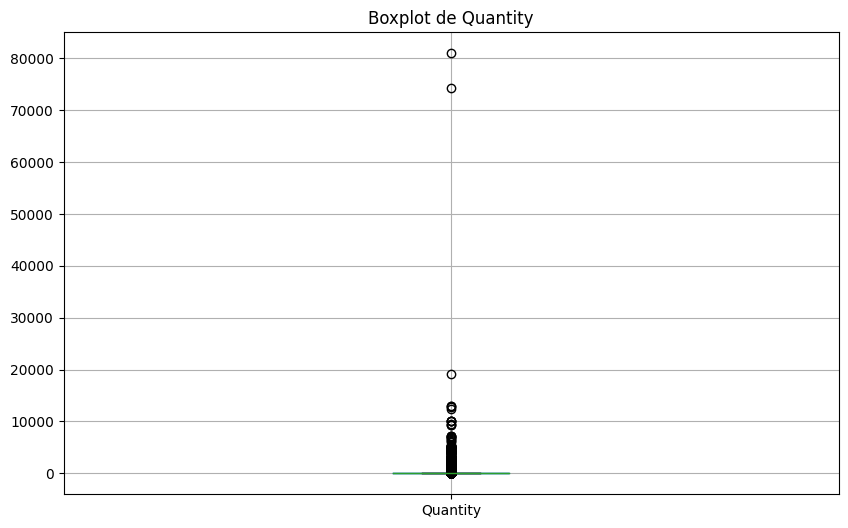

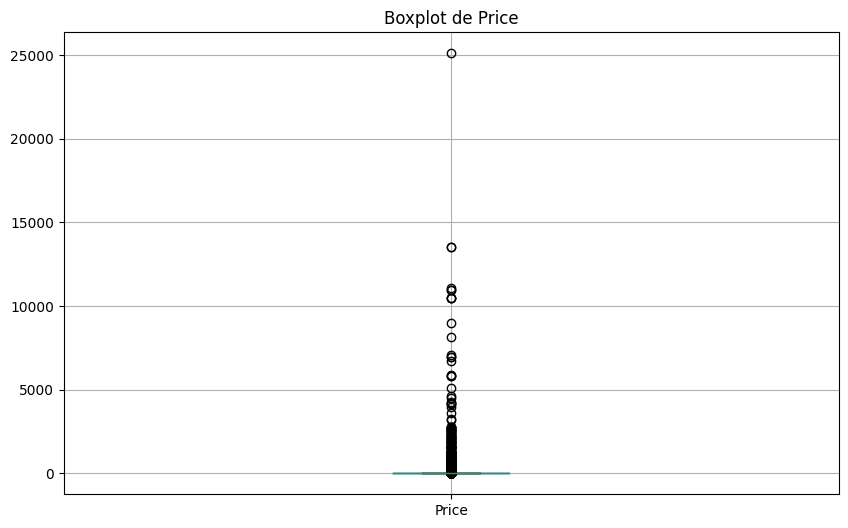

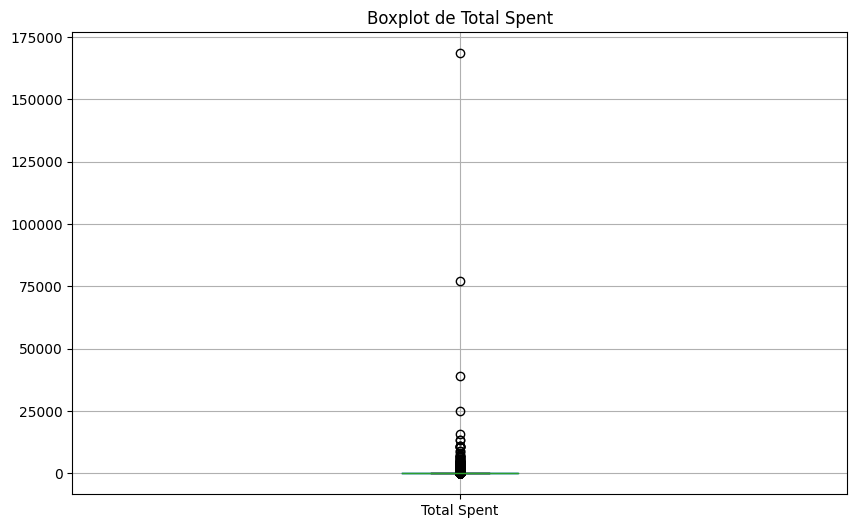

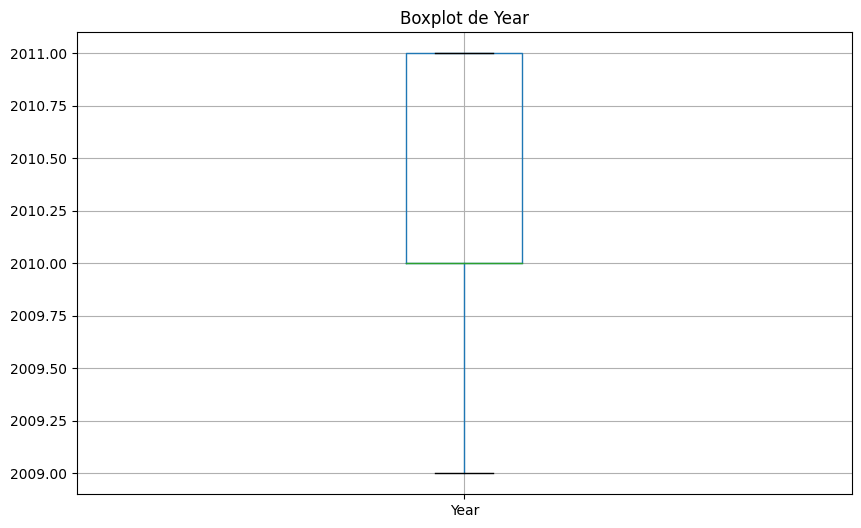

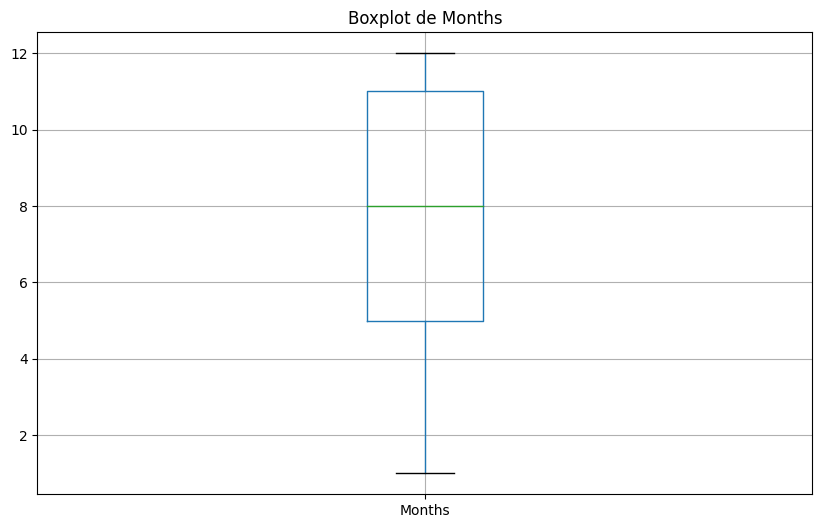

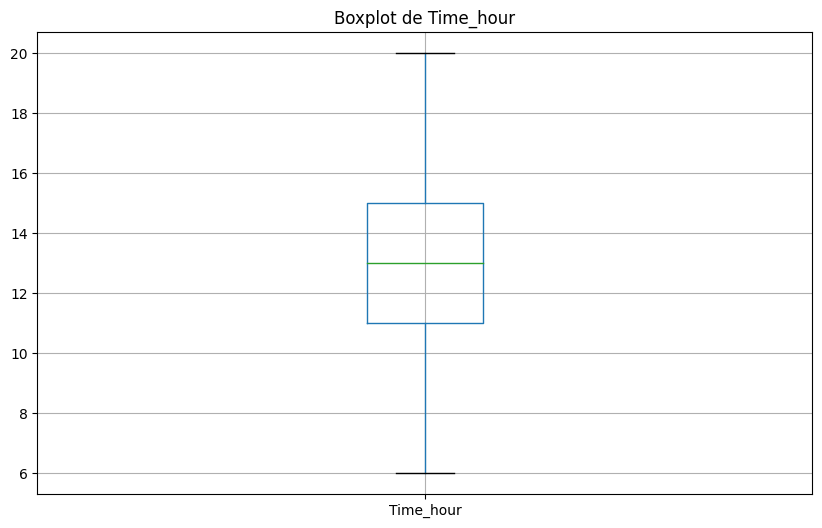

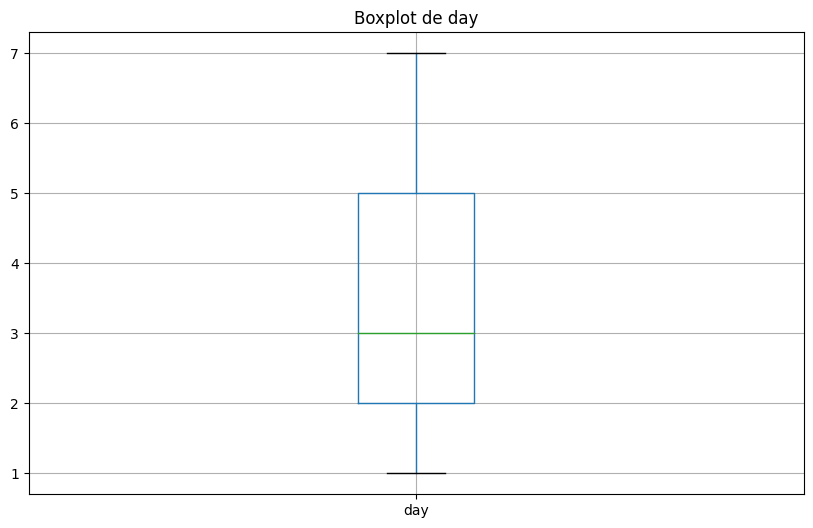

In [ ]:
for col in numCols:
    plt.figure()  # Crea una nueva figura para cada variable
    df.boxplot(column=col)  # Grafica el boxplot de la variable
    plt.title(f'Boxplot de {col}')  # Establece el título del gráfico
    plt.show()  # Muestra el gráfico

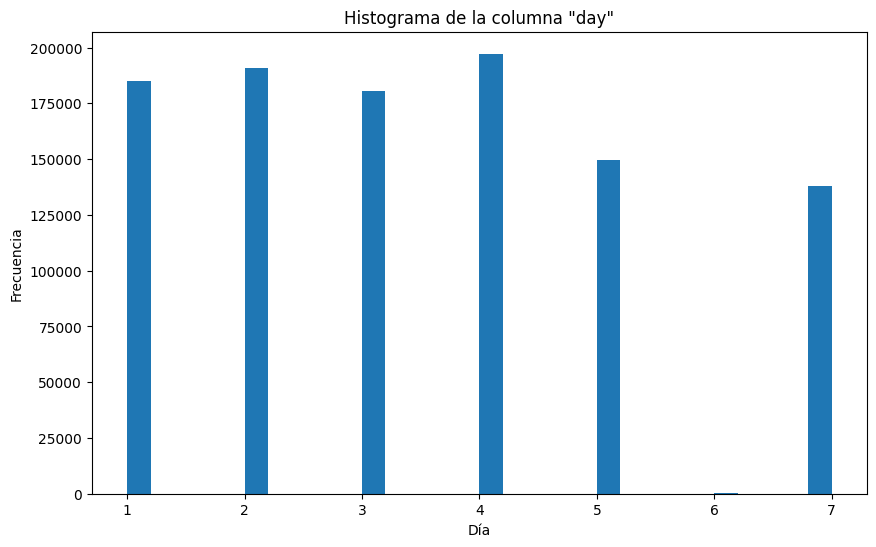

In [ ]:
plt.figure()  # Crea una nueva figura
df['day'].plot(kind='hist', bins=30)  # Grafica el histograma de la columna 'day'
plt.title('Histograma de la columna "day"')  # Establece el título del gráfico
plt.xlabel('Día')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico

In [ ]:
frecuencia_day = df['day'].value_counts()
print(frecuencia_day)

4    197252
2    190937
1    184915
3    180544
5    149493
7    138130
6       400
Name: day, dtype: int64
